In [1]:
using QuadGK , Polynomials , Plots

### Zadanie 1 (1p)
- Korzytając z pakietu <a href="https://github.com/JuliaMath/Polynomials.jl">Polynomials</a> zaimplementuj wielomiany Legendre'a zdefiniowane w taki sposób:

$P_{0}(x)=1$

$P_{1}(x)=x$

$P_{k+1}(x)=\frac{2k+1}{k+1} x P_{k}(x)-\frac{k}{k+1}P_{k-1}(x)$

- narysuj ich wykresy w przedziale (-1,1). 
- sprawdź(np. za pomocą fukcji <i>roots</i> z pakietu Polynomials), że ich zera  sa odciętymi punktów Gaussa. Test wykonaj dla wielomianow od 2 do 4 stopnia
- podaj związek tego faktu z podstawowym twierdzeniem kwadratur Gaussa (z wykładu)

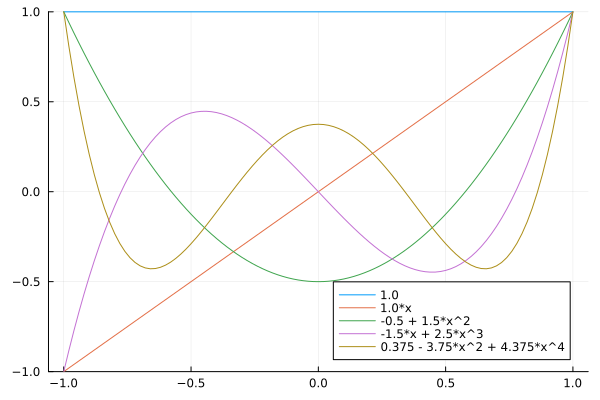

In [2]:
p0 = Polynomial([1.0])
p1 = Polynomial([0.0,1.0])
f = [p0,p1]


for i in 2:4
    pi = (2*i-1)/(i)*p1*f[i] - (i-1)/(i)*f[i-1]
    push!(f,pi)
end

range = -1:1

for p in f
    plot!(p,extrema(range)...)
end


plot!(ylim = (-1.0,1.0))




In [3]:
for i in 3:5
    println(roots(f[i]))
    (xi, coeffs) = gauss(Float64,i-1);
    println(xi, "\n")
end

[-0.5773502691896258, 0.5773502691896256]
[-0.5773502691896258, 0.5773502691896258]

[-0.7745966692414834, 0.7745966692414835, 0.0]
[-0.7745966692414834, 0.0, 0.7745966692414834]

[-0.8611363115940536, -0.33998104358485653, 0.3399810435848563, 0.8611363115940531]
[-0.8611363115940526, -0.3399810435848563, 0.3399810435848563, 0.8611363115940526]



Odcięte xi n-punktowej kwadratury Gaussa z funkcją ważącą w(x) w [a,b] są zerami wielomianu ortogonalnego dla tego samego przedziału i tej samej funkcji ważącej.


### Zadanie 2 (1p)
- Napisz funkcję, która dla podanej liczby punktów Gaussa $k$ oraz funkcji $f$  policzy $\int_{-1}^{1} f dx$
metodą używającą funkcji:
```julia
gauss(k)
```
oraz sumy 
```julia
sum(a .* f.(xp)) 
```
- przetestuj dla wielomianów coraz większych stopni
- sprawdz kiedy przestaje być dokładna, 
- podaj związek z twierdzeniem o  stopniu dokładności kwadratury Gaussa 

In [4]:
function gauss_integral(k,f)
    (xp, a) = gauss(Float64,k);
    return sum(a .* f.(xp))
end

test_arr = [[if j != i  0 else i end for i in 1:j] for j in 1:15]

for i in 1:15
    p = Polynomial(test_arr[i])
    println("Polynomial level: ", i , " Returned value " , (gauss_integral(4, p)), " Expected value: $(1^length(p) - ((-1)^length(p)))")
end




Polynomial level: 1 Returned value 2.0 Expected value: 2
Polynomial level: 2 Returned value -1.1102230246251565e-16 Expected value: 0
Polynomial level: 3 Returned value 2.0000000000000004 Expected value: 2
Polynomial level: 4 Returned value 0.0 Expected value: 0
Polynomial level: 5 Returned value 2.000000000000001 Expected value: 2
Polynomial level: 6 Returned value 0.0 Expected value: 0
Polynomial level: 7 Returned value 2.000000000000001 Expected value: 2
Polynomial level: 8 Returned value 0.0 Expected value: 0
Polynomial level: 9 Returned value 1.8955102040816336 Expected value: 2
Polynomial level: 10 Returned value 

0.0 Expected value: 0
Polynomial level: 11 Returned value 1.7163848396501462 Expected value: 2
Polynomial level: 12 Returned value 0.0 Expected value: 0
Polynomial level: 13 Returned value 1.5039933361099547 Expected value: 2
Polynomial level: 14 Returned value 0.0 Expected value: 0
Polynomial level: 15 Returned value 1.286849526982805 Expected value: 2


Analizując powyższe wyniki możemy zaobserwować, że funkcja przestaje być dokładna przy wielomianie stopnia 9. Twierdzenie o stopniu dokładności kwadratury Gaussa mówi, że jest ona dokładna dla wielomianu o stopniu równym maksymalnie 2n - 1.

### Zadanie 3 (1p)
  
Skorzystaj z rozwiązania zadania 2 do napisania funkcji 
liczącej  całki w dowolnym przedziale $\int_{a}^{b} f(x) dx$ 

dokonując normalizacji  do $\int_{-1}^{1} F(z) dz$ 

podstawiając:

$x=\frac{b+a}{2}+ \frac{b-a}{2} z $ oraz 

$dx =\frac{b-a}{2} dz $

Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.


In [5]:
function integralF(k,f,a,b)
    (roots,coeffs) = gauss(k)
    roots = (b-a)/2 .* roots .+ (b+a)/2
    return (b-a)/2 .* sum(coeffs.*f.(roots))
end

integralF (generic function with 1 method)

In [21]:

t_1 = Polynomial([0,2,1])
calc(x) = x^3/3 + x^2
a = 0
b =5
for i in 1:5
    println("Q: ", i , " Returned value " , (integralF(i, t_1 , a ,b)), " Expected value: $(calc(b) - calc(a))")
end

Q: 1 Returned value 56.25 Expected value: 66.66666666666666
Q: 2 Returned value 66.66666666666666 Expected value: 66.66666666666666
Q: 3 Returned value 66.66666666666666 Expected value: 66.66666666666666
Q: 4 Returned value 66.66666666666669 Expected value: 66.66666666666666
Q: 5 Returned value 66.66666666666666 Expected value: 66.66666666666666


In [17]:

t_2(x) = sin(x) + cos(x)
calc(x) = -cos(x) + sin(x)
a = 0
b = 1
for i in 1:5
    println("Q: ", i , " Returned value " , (integralF(i, t_2 , a ,b)), " Expected value: $(calc(b) - calc(a))")
end

Q: 1 Returned value 1.3570081004945758 Expected value: 1.3011686789397567
Q: 2 Returned value 1.3008576600334831 Expected value: 1.3011686789397567
Q: 3 Returned value 1.3011693469343597 Expected value: 1.3011686789397567
Q: 4 Returned value 1.3011686781812781 Expected value: 1.3011686789397567
Q: 5 Returned value 1.301168678940289 Expected value: 1.3011686789397567


### Zadanie 4 (1p)
Głowną funkcją pakietu QuadGK jest adaptacyjna funkcja <a href="https://juliamath.github.io/QuadGK.jl/stable/#QuadGK.quadgk"> guadgk</a> używająca całkowania  Gauss-Kronroda

- użyj tej funkcji do policzenia  całki dla przykładowego wielomianu.
- funkcja ta ma możliwość liczenia również całek do nieskończoności.


 Policz całkę od minus do plus nieskonczonosci 
 standardowego rozkładu normalnego Gaussa
$ \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

In [8]:
test = Polynomial([0,2,1])
calc(x) = x^3/3 + x^2
a = -1
b = 1
println("Interval: [-1,1]  Expected value :" , calc(a)-calc(b) , "  Returned value: " ,(quadgk(test,a,b)[1]))

Interval: [-1,1]  Expected value :-0.6666666666666665  Returned value: 0.6666666666666667


In [9]:
fun(x) =  exp((-x^2)/2)/sqrt(2*pi)

a =-Inf
b=Inf

println("Interval: [-Inf,Inf]  Expected value : 1  Returned value: " ,(quadgk(fun,a,b)[1]))


Interval: [-Inf,Inf]  Expected value : 1  Returned value: 1.0000000000032583


### Zadanie 5 (3p)
Napisz własne funkcje całkujące -  w wybranym przedziale (a,b) - złożonymi metodami prostokątów, trapezów oraz Simpsona. Dla stałego przedziału zwiększaj liczbę użytych punktów (n). Narysuj wykresy funkcji błędu  w stosunku do wyniku otrzymanego analitycznie, 
w zależnosci od $h=\frac{b-a}{n}$:
1. wykładniczej
2. trygonometrycznej (np. sin (x) w przedziale $[0,2\pi]$)


In [10]:
function rectangle(f, a, b, n)
    h = (b - a) / n
    sum = 0.0
    for i in 0:n-1
        x = a + i * h
        sum += f(x)
    end
    return h * sum
end;


function trapez(f, a, b, n)
    h = (b - a) / n
    sum = 0.0
    for i in 0:n-1
        x = a + i * h
        sum += (f(x) + f(x + h))
    end
    return h * sum/2
end;


function simpson(f, a, b, n)
    h = (b - a) / n
    sum = f(a) + f(b)
    for i in 1:n-1
        x = a + i * h
        if i % 2 == 0
            sum += 2 * f(x)
        else
            sum += 4 * f(x)
        end
    end
    return h / 3 * sum
end;

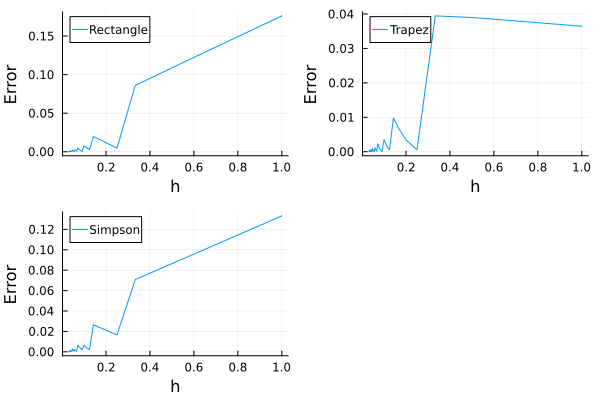

In [11]:

fun(x) = sin(x)
a = 0
b = 2*pi
expected = cos(b)-cos(a)

rect_err(fun, a, b, n) = abs(rectangle(fun, a, b, n) - expected)
trap_err(fun, a, b, n) = abs(trapez(fun, a, b, n) - expected)
simp_err(fun, a, b, n) = abs(simpson(fun, a, b, n) - expected)

ns = pi .*(2:2:64)
h = (b - a) ./ ns

rect_errs = [rect_err(fun, a, b, n) for n in ns]
trap_errs = [trap_err(fun, a, b, n) for n in ns]
simp_errs = [simp_err(fun, a, b, n) for n in ns]

plot(h, [rect_errs trap_errs simp_errs], label=["Rectangle" "Trapez" "Simpson"], xlabel="h", ylabel="Error", layout = 3)


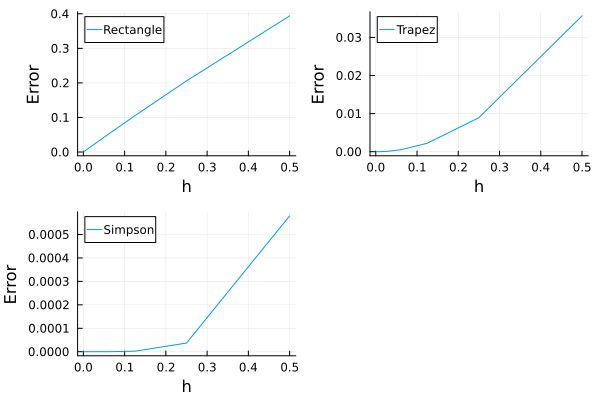

In [12]:

fun2(x) = exp(x)
a = 0
b = 1
expected = exp(b) - exp(a)

rect_err(fun2, a, b, n) = abs(rectangle(fun2, a, b, n) - expected)
trap_err(fun2, a, b, n) = abs(trapez(fun2, a, b, n) - expected)
simp_err(fun2, a, b, n) = abs(simpson(fun2, a, b, n) - expected)

ns = 2 .^(1:10)
h = (b - a) ./ ns

rect_errs = [rect_err(fun2, a, b, n) for n in ns]
trap_errs = [trap_err(fun2, a, b, n) for n in ns]
simp_errs = [simp_err(fun2, a, b, n) for n in ns]

plot(h, [rect_errs trap_errs simp_errs], label=["Rectangle" "Trapez" "Simpson"], xlabel="h", ylabel="Error", layout = 3)
